<a href="https://colab.research.google.com/github/miragasko/ml/blob/main/supervised/01_basics/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip list

In [2]:
#!pip install --upgrade scikit-learn

In [3]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.6.1'

In [8]:
data = {
    'size': ['XL','L','M',np.nan,'M','M'],
    'color': ['red','green','blue','green','red','green'],
    'gender': ['female','male',np.nan,'male','female','female'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes','no','yes','no','yes','no']

}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,female,89.0,NaN,no


In [9]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


In [10]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [11]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [12]:
df.isnull().sum().sum()

5

In [14]:
df.isnull().sum() / len(df)

,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


In [15]:
# SimpleImputer

In [16]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [17]:
from sklearn.impute import SimpleImputer

#strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [18]:
imputer.statistics_

array([415.])

In [19]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [20]:
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,female,89.0,415.0,no


In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [22]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [23]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,female,89.0,415.0,no


In [24]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [25]:
df = df_raw.copy()

In [26]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,female,89.0,NaN,no


In [27]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [28]:
pd.isnull(df['weight'])

,weight
0,False
1,False
2,False
3,True
4,False
5,True


In [29]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,male,129.0,NaN,no
5,M,green,female,89.0,NaN,no


In [31]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [32]:
pd.notnull(df['weight'])

,weight
0,True
1,True
2,True
3,False
4,True
5,False


In [33]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [34]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,female,89.0,NaN,no


In [35]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,male,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,female,89.0,brak,no


In [36]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,male,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,female,89.0,0.0,no


In [38]:
df['size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: size
Non-Null Count  Dtype 
--------------  ----- 
5 non-null      object
dtypes: object(1)
memory usage: 180.0+ bytes


In [39]:
df['size']

,size
0,XL
1,L
2,M
3,NaN
4,M
5,M


In [41]:
df['size'].fillna(value='L', inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,male,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,female,89.0,NaN,no


In [42]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [44]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [53]:
# missing values - time series

In [48]:
data = {"price": [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


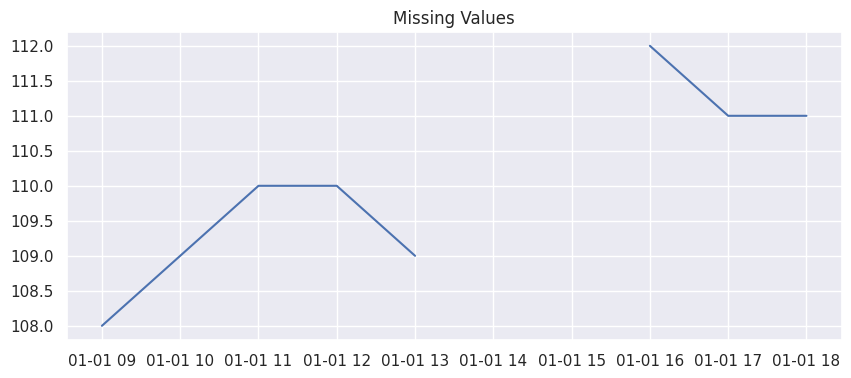

In [55]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('Missing Values')
_ = plt.plot(df.price)

In [56]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=690, height=400, title='Time series - missing values')

In [51]:
# removing missing values

In [57]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index','price', width=600, height=400, title='Time series - missing values')

In [58]:
# filling missing values with 0

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index','price_fill', width=600, height=400, title='Time series - missing values - input 0')

In [68]:
# filling missing values with average

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index','price_fill', width=600, height=400, title='Time series - missing values - input avg')

In [69]:
# application of interpolation

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index','price_fill', width=600, height=400, title='Time series - missing values - interpolation')

In [61]:
# forward fill method

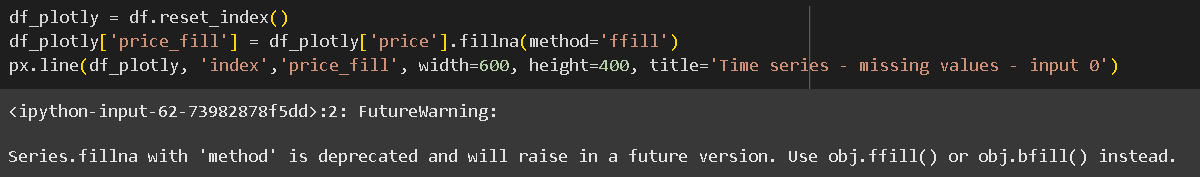

In [70]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].ffill()
px.line(df_plotly, 'index','price_fill', width=600, height=400, title='Time series - missing values - forward fill')

In [65]:
# backward fill method

In [71]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].bfill()
px.line(df_plotly, 'index','price_fill', width=600, height=400, title='Time series - missing values - backward fill')